In [1]:
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import urllib.request
import zipfile
import os

In [ ]:
# Data Sources
naturls = ['https://www.bls.gov/oes/special.requests/oesm17in4.zip', 
'https://www.bls.gov/oes/special.requests/oesm16in4.zip',
'https://www.bls.gov/oes/special.requests/oesm15in4.zip',
'https://www.bls.gov/oes/special.requests/oesm14in4.zip',
'https://www.bls.gov/oes/special.requests/oesm13in4.zip',
'https://www.bls.gov/oes/special.requests/oesm12in4.zip',
'https://www.bls.gov/oes/special.requests/oesm11in4.zip',
'https://www.bls.gov/oes/special.requests/oesm10in4.zip',
'https://www.bls.gov/oes/special.requests/oesm09in4.zip',
'https://www.bls.gov/oes/special.requests/oesm08in4.zip']

natzip = ['data/raw/oesm17in4.zip', 
'data/raw/oesm16in4.zip',
'data/raw/oesm15in4.zip',
'data/raw/oesm14in4.zip',
'data/raw/oesm13in4.zip',
'data/raw/oesm12in4.zip',
'data/raw/oesm11in4.zip',
'data/raw/oesm10in4.zip',
'data/raw/oesm09in4.zip',
'data/raw/oesm08in4.zip']

natData = {'2008': {
            'inFiles': {
                1: {'filename': "./Data/raw/nat3d_M2008_dl.xls", 'sheet': "nat3d_dl"}
            },
            'outFile': 'data/preprocessed/nat2008.csv',
            },
           '2009': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/nat3d_M2009_dl.xls", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2009.csv', 
           },
           '2010': {
               'inFiles': {
                   1: {'filename': "./Data/raw/nat3d_M2010_dl.xls", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2010.csv', 
           },
           '2011': {
               'inFiles': { 
                1: {'filename': "./Data/raw/nat3d_M2011_dl.xls", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2011.csv', 
           },
           '2012': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm12in4/nat3d_M2012_dl.xls", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2012.csv', 
           },
           '2013': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm13in4/nat3d_M2013_dl.xls", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2013.csv', 
           },
           '2014': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm14in4/nat3d_M2014_dl.xlsx", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2014.csv', 
           },
           '2015': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm15in4/nat3d_M2015_dl.xlsx", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2015.csv', 
           },
           '2016': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm16in4/nat3d_M2016_dl.xlsx", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2016.csv', 
           },
           '2017': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/oesm17in4/nat3d_M2017_dl.xlsx", 'sheet': "nat3d_dl"}
               },
               'outFile': 'data/preprocessed/nat2017.csv', 
           }
        }
nat2017Data = {
    'url': 'https://www.bls.gov/oes/special.requests/oesm17nat.zip',
    'zipfile' : "./data/raw/noesm17nat.zip",
    'excelfile' : "./data/raw/oesm17nat/national_M2017_dl.xlsx",
    'sheet': 'national_dl'
}
natfile = "./data/preprocessed/nat.csv"
nat2017file = "./data/preprocessed/natocc2017.csv"

In [ ]:
# Data Sources
urls = ['https://www.bls.gov/oes/special.requests/oesm17ma.zip', 
'https://www.bls.gov/oes/special.requests/oesm16ma.zip',
'https://www.bls.gov/oes/special.requests/oesm15ma.zip',
'https://www.bls.gov/oes/special.requests/oesm14ma.zip',
'https://www.bls.gov/oes/special.requests/oesm13ma.zip',
'https://www.bls.gov/oes/special.requests/oesm12ma.zip',
'https://www.bls.gov/oes/special.requests/oesm11ma.zip',
'https://www.bls.gov/oes/special.requests/oesm10ma.zip',
'https://www.bls.gov/oes/special.requests/oesm09ma.zip',
'https://www.bls.gov/oes/special.requests/oesm08ma.zip']

oeszip = ['data/raw/oesm17ma.zip', 
'data/raw/oesm16ma.zip',
'data/raw/oesm15ma.zip',
'data/raw/oesm14ma.zip',
'data/raw/oesm13ma.zip',
'data/raw/oesm12ma.zip',
'data/raw/oesm11ma.zip',
'data/raw/oesm10ma.zip',
'data/raw/oesm09ma.zip',
'data/raw/oesm08ma.zip']

oesData = {'2008': {
            'inFiles': {
                1: {'filename': "./Data/raw/MSA__M2008_dl_1.xls", 'sheet': "MSA_dl_1"},
                2: {'filename': "./Data/raw/MSA_M2008_dl_2.xls", 'sheet': "MSA_dl_2"},
                3: {'filename': "./Data/raw/MSA_M2008_dl_3.xls", 'sheet': "MSA_dl_3"}
            },
            'outFile': 'data/preprocessed/oes2008.csv',
            },
           '2009': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_dl_1.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_dl_2.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_dl_3.xls",'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2009.csv', 
           },
           '2010': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2010_dl_1.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2010_dl_2.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2010_dl_3.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2010.csv', 
           },
           '2011': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2011_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2011_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2011_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2011.csv', 
           },
           '2012': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2012_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2012_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2012_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2012.csv', 
           },
           '2013': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2013_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2013_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2013_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2013.csv', 
           },
           '2014': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm14ma/MSA_M2014_dl.xlsx", 'sheet': "MSA_dl"}
               },
               'outFile': 'data/preprocessed/oes2014.csv', 
           },
           '2015': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm15ma/MSA_M2015_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2015.csv', 
           },
           '2016': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm16ma/MSA_M2016_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2016.csv', 
           },
           '2017': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm17ma/MSA_M2017_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2017.csv', 
           }
        }
oesfile = "./data/preprocessed/oes.csv"

In [ ]:
def getData(urls, files):
    for i, j in zip(urls, files):
        urllib.request.urlretrieve(i, j)
        with zipfile.ZipFile(j) as oeszip:
            oeszip.extractall(path = 'data/raw/')
            os.remove(oeszip)
    
    urllib.request.urlretrieve(nat2017Data['url'], nat2017Data['zipfile'])
    with zipfile.ZipFile(nat2017Data['zipfile']) as natzip:
        natzip.extractall(path='data/raw')
    
#getData(naturls, natzip)  

In [ ]:
def prepNATData():
    directory = "./data/preprocessed"
    if not os.path.exists(directory):
        os.makedirs(directory)
    dfcols = ['YEAR', 'NAICS', 'NAICS_TITLE', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP',
              'EMP_PRSE', 'A_MEAN', 'MEAN_PRSE', 'A_MEDIAN',
              'TOT_EMP_SE', 'TOT_EMP_ME', 'A_MEAN_SE', 'A_MEAN_ME', 
              'A_MEDIAN_SE', 'A_MEDIAN_ME']
    allData = []
    for year, info in natData.items():
        
        # Concatenate files
        dfs = []
        for file in info['inFiles']:
            xl = pd.ExcelFile(info['inFiles'][file]['filename'])
            pdf = xl.parse(info['inFiles'][file]['sheet'])
            dfs.append(pdf)
        df = pd.concat(dfs)
        
        # Remove NAs, missing values, and convert strings to numeric, and add year to dataframe
        df = (df
              .replace(["**", "*", "#"], pd.np.nan).dropna(axis=0, how = 'any',
                                                          subset = ['TOT_EMP', 'EMP_PRSE',
                                                                    'A_MEAN', 'MEAN_PRSE',
                                                                    'A_MEDIAN'])
              .apply(pd.to_numeric, errors = 'ignore')
              .assign(YEAR = year))
        
        # Compute standard errors 
        df = df.assign(TOT_EMP_SE = lambda x: x.TOT_EMP * x.EMP_PRSE / 100,
                  A_MEAN_SE = lambda x: x.A_MEAN * x.MEAN_PRSE / 100,
                  A_MEDIAN_SE = lambda x: x.MEAN_PRSE * x.A_MEAN * 1.2533 / 100)
        
        # Compute margin of errors 
        df = df.assign(TOT_EMP_ME = lambda x: 1.96 * x.TOT_EMP_SE,
                  A_MEAN_ME = lambda x: 1.96 * x.A_MEAN_SE,
                  A_MEDIAN_ME = lambda x: 1.96 * x.A_MEDIAN_SE)
        
        # Select Math and CS Jobs, relevant columns, write to file and append to all data.
        df = (df[(df.OCC_CODE == '15-0000')]
              .drop(df.columns.difference(dfcols), axis = 1, inplace = False))
        df.to_csv(path_or_buf = info['outFile'])        
        allData.append(df)
        
    # Concatenate allData into single data frame
    df = pd.concat(allData)
        
    # Dedup area names and set index 
    naics = df[['NAICS', 'NAICS_TITLE']]
    naics = naics.loc[naics.duplicated(subset = ['NAICS']) == 0]
    df = df.drop(['NAICS_TITLE'], axis=1)
    df = df.merge(naics, how='left', on='NAICS')
    df = df.rename(columns = {'NAICS_TITLE': 'Industry'})
    df = df.set_index("Industry")
    
    # Write to csv
    df.to_csv(path_or_buf = natfile)
    return df
#nat = prepNATData()

In [ ]:
def prepNAT2017():
    cols = ['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'A_MEAN', 'MEAN_PRSE', 'A_MEDIAN']
    df = pd.read_excel(io = nat2017Data['excelfile'], sheetname = nat2017Data['sheet'], usecols = cols)
    df = (df
      .replace(["**", "*", "#"], pd.np.nan).dropna(axis=0, how = 'any',
                                                  subset = ['TOT_EMP', 'EMP_PRSE',
                                                            'A_MEAN', 'MEAN_PRSE',
                                                            'A_MEDIAN'])
      .apply(pd.to_numeric, errors = 'ignore'))
    # Compute standard errors 
    df = df.assign(TOT_EMP_SE = lambda x: x.TOT_EMP * x.EMP_PRSE / 100,
              A_MEAN_SE = lambda x: x.A_MEAN * x.MEAN_PRSE / 100,
              A_MEDIAN_SE = lambda x: x.MEAN_PRSE * x.A_MEAN * 1.2533 / 100)
    
    # Compute margin of errors 
    df = df.assign(TOT_EMP_ME = lambda x: 1.96 * x.TOT_EMP_SE,
              A_MEAN_ME = lambda x: 1.96 * x.A_MEAN_SE,                       
              A_MEDIAN_ME = lambda x: 1.96 * x.A_MEDIAN_SE)
    
    # Select relevant occupation data
    df = df[df['OCC_CODE'].str.contains("15-")]
    df = df[df['OCC_GROUP'] == 'detailed']
    df = df.rename(columns = {'OCC_TITLE': 'Occupation'})
    df = df.set_index("Occupation")
    
    # Write to file
    df.to_csv(path_or_buf = nat2017file)
    return(df)
#nat2017 = prepNAT2017()

In [ ]:
def prepOESData():
    directory = "./data/preprocessed"
    if not os.path.exists(directory):
        os.makedirs(directory)
    dfcols = ['YEAR', 'PRIM_STATE', 'AREA', 'AREA_NAME', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP',
              'EMP_PRSE', 'JOBS_1000','A_MEAN', 'MEAN_PRSE', 'A_MEDIAN',
              'TOT_EMP_SE', 'TOT_EMP_ME', 'JOBS_1000_SE','JOBS_1000_ME',
              'A_MEAN_SE', 'A_MEAN_ME', 'A_MEDIAN_SE', 'A_MEDIAN_ME']
    allData = []
    for year, info in oesData.items():
        
        # Concatenate files
        dfs = []
        for file in info['inFiles']:
            xl = pd.ExcelFile(info['inFiles'][file]['filename'])
            pdf = xl.parse(info['inFiles'][file]['sheet'])
            dfs.append(pdf)
        df = pd.concat(dfs)
        
        # Remove NAs, missing values, and convert strings to numeric, and add year to dataframe
        df = (df
              .replace(["**", "*", "#"], pd.np.nan).dropna(axis=0, how = 'any',
                                                          subset = ['TOT_EMP', 'EMP_PRSE',
                                                                    'A_MEAN', 'MEAN_PRSE',
                                                                    'A_MEDIAN'])
              .apply(pd.to_numeric, errors = 'ignore')
              .assign(YEAR = year))
        
        # Create JOBS_1000 variable for 2008 data
        if (year == '2008'):
            df2cols = ['AREA', 'TOT_EMP']
            df2 =  (df[(df.OCC_CODE == '00-0000')]
                    .drop(df.columns.difference(df2cols), axis = 1, inplace = False)
                    .rename(columns = {'TOT_EMP': 'TOT_EMP_ALL'}))
            df = (df.merge(df2, how = 'left', on = 'AREA')
              .assign(JOBS_1000 = lambda x: x.TOT_EMP / (x.TOT_EMP_ALL/1000)))         
                
        # Compute standard errors 
        df = df.assign(TOT_EMP_SE = lambda x: x.TOT_EMP * x.EMP_PRSE / 100,
                  JOBS_1000_SE = lambda x: x.JOBS_1000 * x.EMP_PRSE / 100,
                  A_MEAN_SE = lambda x: x.A_MEAN * x.MEAN_PRSE / 100,
                  A_MEDIAN_SE = lambda x: x.MEAN_PRSE * x.A_MEAN * 1.2533 / 100)
        
        # Compute margin of errors 
        df = df.assign(TOT_EMP_ME = lambda x: 1.96 * x.TOT_EMP_SE,
                  JOBS_1000_ME = lambda x: 1.96 * x.JOBS_1000_SE,
                  A_MEAN_ME = lambda x: 1.96 * x.A_MEAN_SE,                       
                  A_MEDIAN_ME = lambda x: 1.96 * x.A_MEDIAN_SE)
        
        # Select Math and CS Jobs, relevant columns, write to file and append to all data.
        df = (df[(df.OCC_CODE == '15-0000')]
              .drop(df.columns.difference(dfcols), axis = 1, inplace = False))
        df.to_csv(path_or_buf = info['outFile'])        
        allData.append(df)
        
    # Concatenate allData into single data frame
    df = pd.concat(allData)
    
    # Dedup area names and set index 
    areas = areas = df[['AREA', 'AREA_NAME']]
    areas = areas.loc[areas.duplicated(subset = ['AREA']) == 0]
    df = df.drop(['AREA_NAME'], axis=1)
    df = df.merge(areas, how='left', on='AREA')
    df = df.rename(columns = {'AREA_NAME': 'Market'})
    df = df.set_index("Market")
    
    # Write to csv
    df.to_csv(path_or_buf = oesfile)
    return df
#oes= prepOESData()

In [ ]:
def prepOES2017():
    cols = ['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'A_MEDIAN']
    df = pd.read_excel(io = oesData['2017']['inFiles'][1]['filename'], 
                       sheetname =oesData['2017']['inFiles'][1]['sheet'], usecols = cols)
    df = (df
      .replace(["**", "*", "#"], pd.np.nan).dropna(axis=0, how = 'any',
                                                  subset = ['A_MEDIAN'])
      .apply(pd.to_numeric, errors = 'ignore'))  
    
    # Select relevant occupation data
    df = df[df['OCC_CODE'].str.contains("15-")]
    df = df[df['OCC_GROUP'] == 'detailed']
    df = df.rename(columns = {'OCC_TITLE': 'Occupation'})
    df = df.set_index("Occupation")
    
    # Write to file
    df.to_csv(path_or_buf = 'data/preprocessed/oes2017all.csv')
    return(df)
#oes2017all = prepOES2017()

In [2]:
def loadData(path):
    df = pd.read_csv(path, encoding = 'latin1')
    return df
oes = loadData(path = "./data/preprocessed/oes.csv")
nat = loadData(path = "./data/preprocessed/nat.csv")
occ = loadData(path = "./data/preprocessed/natocc2017.csv")
oes2017 = loadData(path = "./data/preprocessed/oes2017all.csv")

In [3]:
def compareData(df, on, idx):
    df2008 = (df[(df.YEAR == 2008)]
               .rename(columns = {'A_MEDIAN': 'A_MEDIAN_2008',
                                  'JOBS_1000': 'JOBS_1000_2008',
                                  'TOT_EMP': 'TOT_EMP_2008'}))

    df2017 = (df[(df.YEAR == 2017)]
               .rename(columns = {'A_MEDIAN': 'A_MEDIAN_2017',
                                  'JOBS_1000': 'JOBS_1000_2017',
                                  'TOT_EMP': 'TOT_EMP_2017'}))

    compare = pd.merge(left = df2008, right = df2017, how = 'left', on = on)
    compare = (compare
               .assign(SALARY_PCT_GROWTH = lambda x: (x.A_MEDIAN_2017 - x.A_MEDIAN_2008) / x.A_MEDIAN_2008 * 100,
                       JOB_PCT_GROWTH = lambda x: (x.TOT_EMP_2017 - x.TOT_EMP_2008) / x.TOT_EMP_2008 * 100))
    compare = compare.set_index(idx)
    return compare
marketComparison = compareData(oes, ['AREA', 'Market'], 'Market')              
industryComparison = compareData(nat, ['NAICS', 'Industry'], 'Industry')

In [88]:
def plotBar(ax, df, ci, xvar, yvar, xlab, ylab, title):
    barwidth = .8
    sns.set_style("whitegrid")
    x = np.arange(df.shape[0]) * 1.08
    y = df[yvar]
    ax = sns.barplot(x=xvar, y=yvar, data=df, palette = "viridis", hue = xvar, ax = ax)    
    ax.set(xticklabels=[])
    ax.set(xlabel = xlab, ylabel = ylab)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.5)
    for patch in ax.patches:
        patch.set_width(barwidth)
    ax.set_title(label = title)
    ax.set_xlim((-.7,10.5))
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.title.set(y = 1.8)
    ax.errorbar(x, y, yerr = ci)
    return(ax)
    #plt.show()

In [89]:
def plotViolin(ax, df, xvar, yvar, xlab, ylab, title):
    sns.set_style("whitegrid")
    ax = sns.violinplot(x=xvar, y=yvar, data = df, hue=xvar, palette='viridis', ax = ax)
    ax.set(xticklabels=[])
    ax.set(xlabel = xlab, ylabel = ylab)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.5)
    ax.set(title = title)
    ax.title.set(y = 1.8)
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    return (ax)
    #plt.show()

In [90]:
def plotTopGrowth(ax, df, size, title):
    # Obtain data for appropriate data set and employment market size
    cols = ['TOT_EMP_2008', 'TOT_EMP_2017']
    n = (df.shape[0])
    topGrowth = (df
                 .nlargest(int(n * size / 3), columns = 'TOT_EMP_2017')
                 .nlargest(5, columns = 'JOB_PCT_GROWTH')
                 .drop(df.columns.difference(cols), axis = 1, inplace = False)
                 .apply(pd.to_numeric, errors = 'ignore')
                 .rename(columns = {'TOT_EMP_2008': '2008',
                                    'TOT_EMP_2017': '2017'})
                 .transpose())
    ax = topGrowth.plot(topGrowth.index.name, topGrowth.columns, title = title, ax=ax)
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #ax.legend(loc='upper left')
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.5)
    ax.title.set(y = 1.8)
    return(ax)

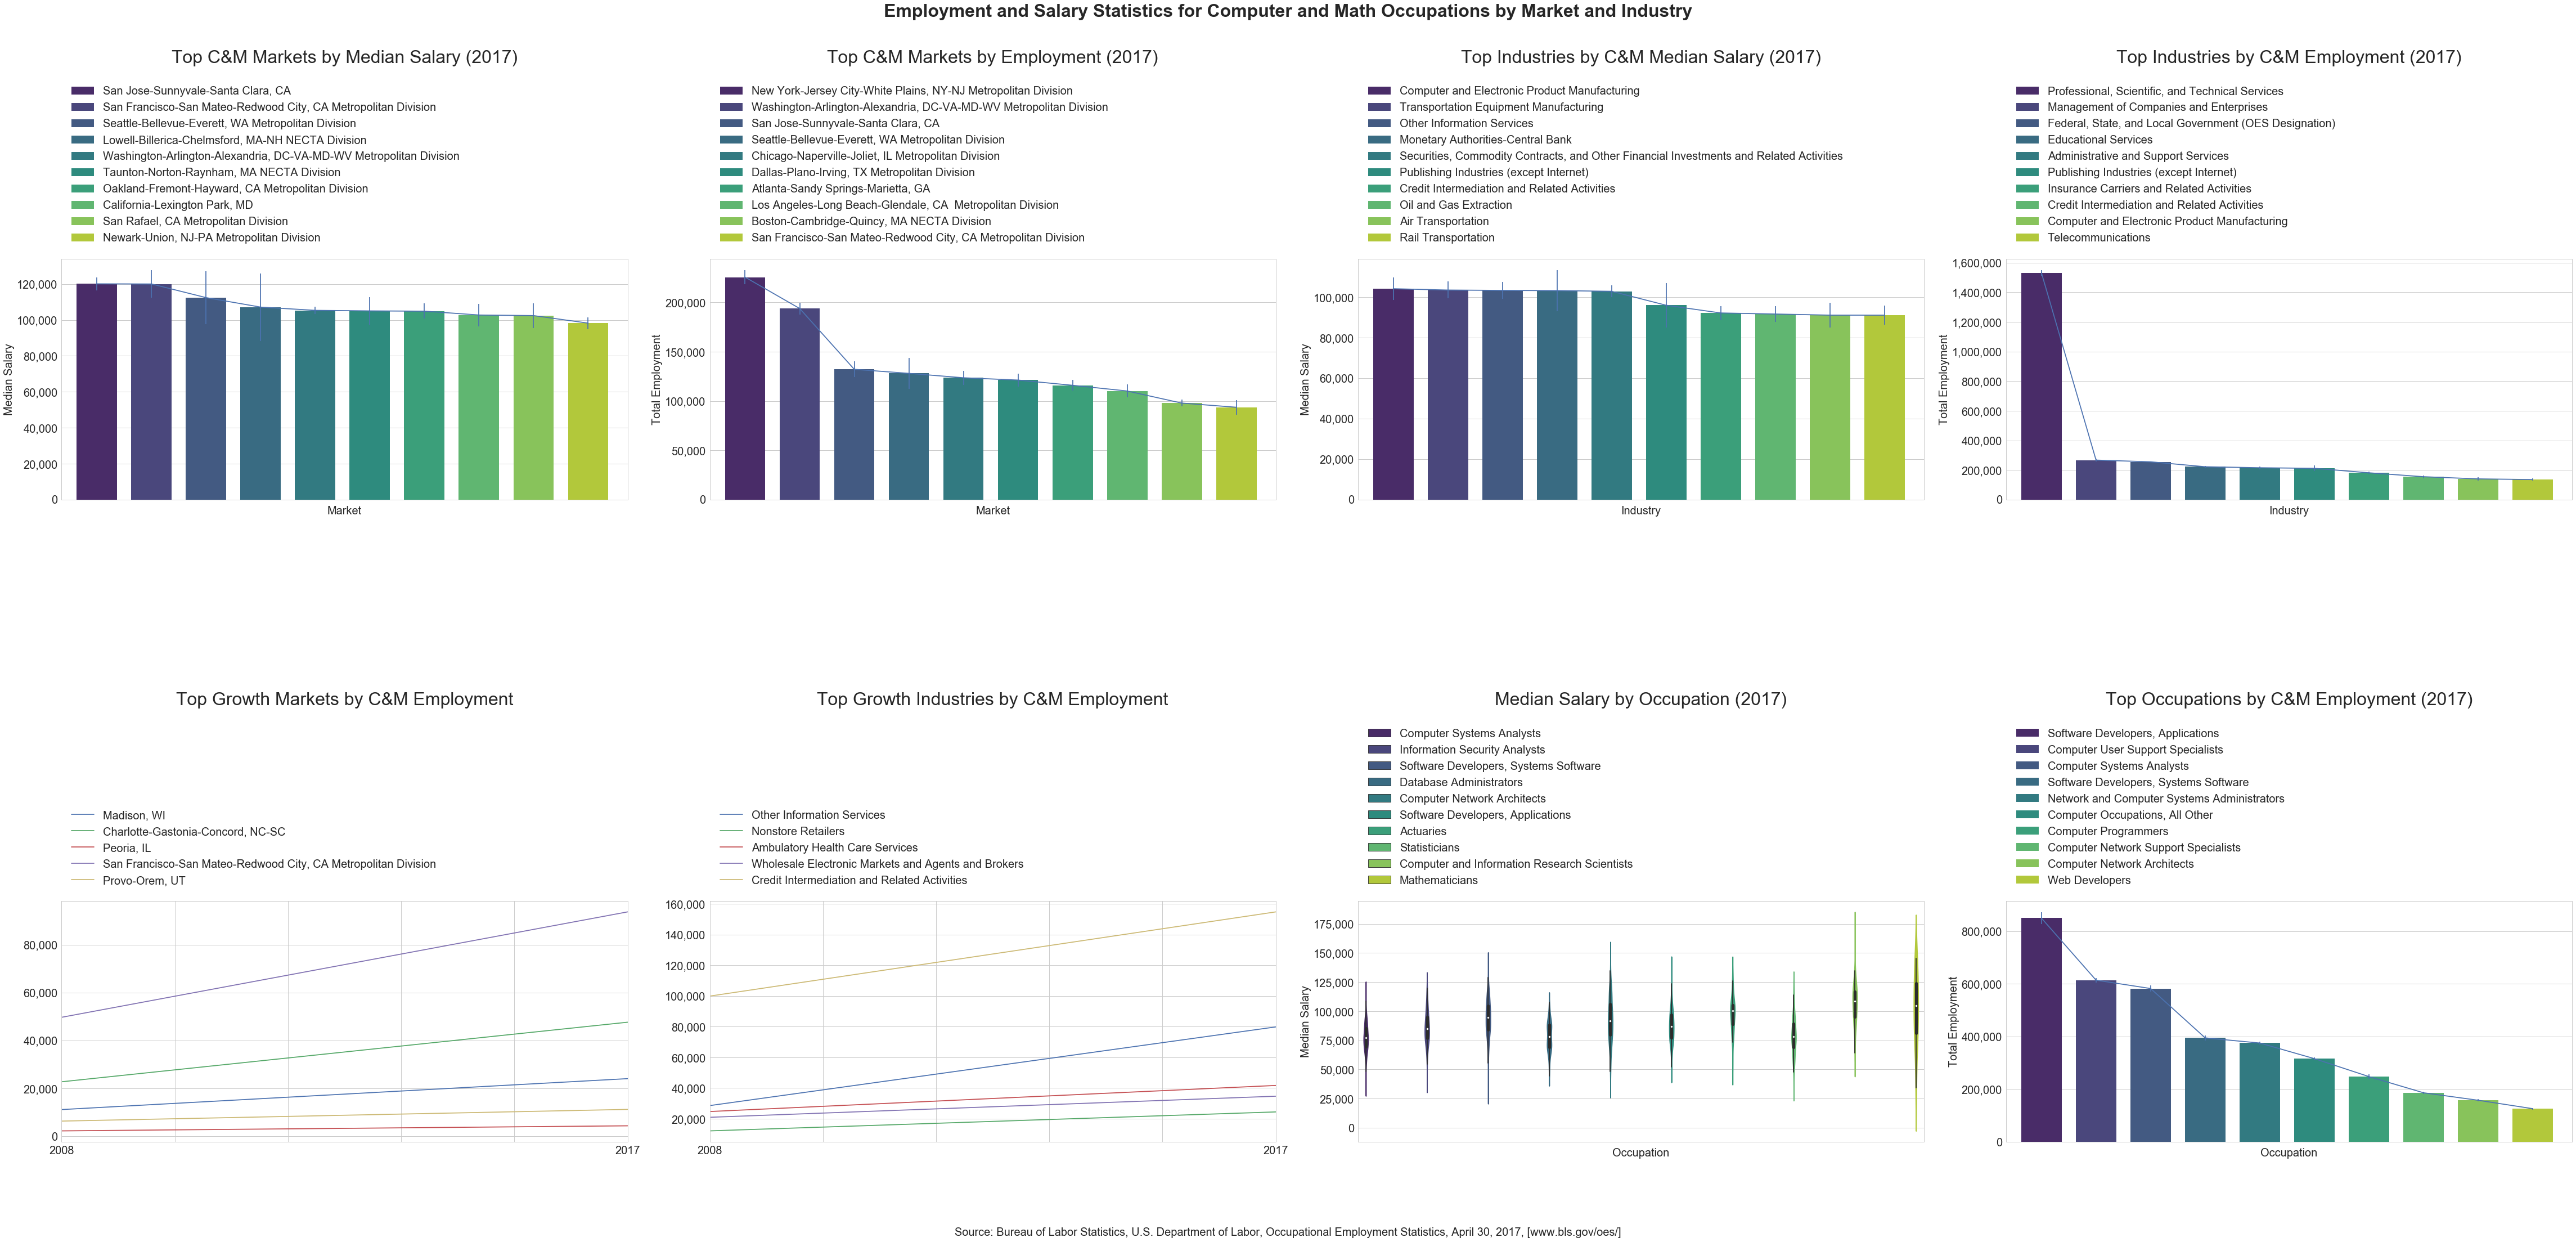

In [95]:
def plots():    
    # Obtain figure and axes objects.
    plt.clf()
    fig, ax = plt.subplots(2,4, figsize = (64,32))
    fig.suptitle('Employment and Salary Statistics for Computer and Math Occupations by Market and Industry', 
                 fontsize=32, y=.9, fontweight='bold')

    # Top markets by median salary
    topSalary = (oes[(oes.YEAR == 2017)][['Market', 'A_MEDIAN', 'A_MEDIAN_ME']].nlargest(n = 10, columns = 'A_MEDIAN'))
    plotBar(ax[0,0], topSalary, topSalary['A_MEDIAN_ME'], "Market", "A_MEDIAN",  "Market", "Median Salary", "Top C&M Markets by Median Salary (2017)")
            
    # Top markets by employment
    topJobs = (oes[(oes.YEAR == 2017)][['Market', 'TOT_EMP', 'TOT_EMP_ME']].nlargest(n = 10, columns = 'TOT_EMP'))
    plotBar(ax[0,1], topJobs, topJobs['TOT_EMP_ME'],"Market", "TOT_EMP",  "Market", "Total Employment", "Top C&M Markets by Employment (2017)")  
    
    # Top industries by median salary
    topSalary = (nat[(nat.YEAR == 2017)][['Industry', 'A_MEDIAN', 'A_MEDIAN_ME']].nlargest(n = 10, columns = 'A_MEDIAN'))
    plotBar(ax[0,2], topSalary, topSalary['A_MEDIAN_ME'], "Industry", "A_MEDIAN",  "Industry", "Median Salary", "Top Industries by C&M Median Salary (2017)")
    
    # Top industries by employment
    topJobs = (nat[(nat.YEAR == 2017)][['Industry', 'TOT_EMP', 'TOT_EMP_ME']].nlargest(n = 10, columns = 'TOT_EMP'))
    plotBar(ax[0,3], topJobs, topJobs['TOT_EMP_ME'], "Industry", "TOT_EMP",  "Industry", "Total Employment", "Top Industries by C&M Employment (2017)") 
    
    # Growth plots
    plotTopGrowth(ax[1,0], marketComparison, size = 1, title = "Top Growth Markets by C&M Employment")
    plotTopGrowth(ax[1,1], industryComparison, size = 1, title = "Top Growth Industries by C&M Employment")
    
    # Median salaries by occupation (violin)
    topOcc = oes2017.groupby('Occupation')['A_MEDIAN'].agg('mean').nlargest(n=10).reset_index()
    topOcc = pd.merge(oes2017, topOcc, on = 'Occupation')
    plotViolin(ax[1,2], topOcc, "Occupation", "A_MEDIAN_x",  "Occupation", "Median Salary", "Median Salary by Occupation (2017)")    
    
    # Top occupations by employment 
    topJobs = (occ[['Occupation', 'TOT_EMP', 'TOT_EMP_ME']].nlargest(n = 10, columns = 'TOT_EMP'))
    plotBar(ax[1,3], topJobs, topJobs['TOT_EMP_ME'], "Occupation", "TOT_EMP",  "Occupation", "Total Employment", "Top Occupations by C&M Employment (2017)") 
          
    # Caption
    cite = 'Source: Bureau of Labor Statistics, U.S. Department of Labor, Occupational Employment Statistics, April 30, 2017, [www.bls.gov/oes/]'
    fig.text(.5, -.05, cite, ha='center')

    # Render plot and png
    fig.tight_layout()
    SMALL_SIZE = 16
    MEDIUM_SIZE = 20
    LARGE_SIZE = 24
    VLARGE_SIZE = 32

    plt.rc('font', size=MEDIUM_SIZE)           # controls default text sizes
    plt.rc('axes', titlesize=VLARGE_SIZE)      # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)      # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)     # legend fontsize
    plt.rc('figure', titlesize=VLARGE_SIZE)    # fontsize of the figure title
    plt.savefig("plots.png",bbox_inches='tight', dpi=200, orientation='portrait', facecolor='white')
    plt.show()
            
plots()